In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datadir = './datos/'

# Ejercicios de transformación de datos

En las siguientes secciones del block de notas se plantean ejercicios relacionados con las transformaciones de datos vistas en clase hasta ahora. Cada sección contiene un «esqueleto» de código que debe ser completado para solucionar las cuestiones planteadas en los respectivos encabezados, junto con un enlace a la documentación correspondiente de [scikit-learn](https://scikit-learn.org).

En general se trata de preparar los datos, entrenar un modelo y observar y comentar los resultados obtenidos, haciendo en algunos casos, algunas comparativas.

**Importante**: recuerda que para evitar filtración de datos (data leaking) hay que calcular los parámetros de las transformaciones (fit) usando únicamente el conjunto de entrenamiento; posteriormente se aplican (transform) tanto al conjunto de entrenamiento como al de test.

## Codificación categórico $\rightarrow$ numérico

### One hot encoder

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder)

* dataset: *breast-cancer.csv*
* modelo: regresión logística
* medida de rendimiento: `accuracy_score`
* `OneHotEncoder`
* `LabelEncoder`

Prueba a usar codificación 1 a k y codificación 1 a k-1 (siendo k el número de categorías) y comenta los resultados.

In [3]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv(datadir + 'breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
ohe_full = OneHotEncoder()
ohe_reduced = OneHotEncoder(drop="first")

X_train_encoded_full = ohe_full.fit_transform(X_train)
X_test_encoded_full = ohe_full.transform(X_test)

X_train_encoded_reduced = ohe_reduced.fit_transform(X_train)
X_test_encoded_reduced = ohe_reduced.transform(X_test)

# label encode target variable

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# define the model

lr_full = LogisticRegression()
lr_reduced = LogisticRegression()

# fit on the training set

lr_full.fit(X_train_encoded_full, y_train_encoded)
lr_reduced.fit(X_train_encoded_reduced, y_train_encoded)

# predict on test set

yhat_full = lr_full.predict(X_test_encoded_full)
yhat_reduced = lr_reduced.predict(X_test_encoded_reduced)

# evaluate predictions
accuracy_full = accuracy_score(yhat_full, y_test_encoded)
accuracy_reduced = accuracy_score(yhat_reduced, y_test_encoded)
print(f"Accuracy full rank: {accuracy_full:.6%}\tAccuracy reduced: {accuracy_reduced:.6%}")

Accuracy full rank: 70.526316%	Accuracy reduced: 70.526316%


Se puede observar que ambos métodos de codificación, sea 1 a k ó 1 a k-1, ambos dan resultados idénticos.

### Ordinal Encoder

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)

* dataset: *breast-cancer.csv*
* modelo: regresión logística
* medida de rendimiento: `accuracy_score`
* `OrdinalEncoder`
* `LabelEncoder`

In [4]:
# evaluate logistic regression on the breast cancer dataset with an ordinal encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv(datadir + 'breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# ordinal encode input variables

oe = OrdinalEncoder()

X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

# label encode target variable

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# define the model

lr = LogisticRegression()

# fit on the training set

lr.fit(X_train_encoded, y_train_encoded)

# predict on test set

yhat = lr.predict(X_test_encoded)

# evaluate predictions
accuracy = accuracy_score(yhat, y_test_encoded)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 75.79%


## Escalado

Para temas de simplificación de código mediante generalización, se creará un "escalar" de identidad, que no hará nada.

In [5]:
class IdentityScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X
    def fit_transform(self, X, y=None):
        return X


### Escalado [0, 1]

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

* dataset: *pima-indians-diabetes.csv*
* modelo: KNN (pruebas con diferente números de vecinos; ver código)
* medida de rendimiento: `accuracy_score`
* `MinMaxScaler`
* `LabelEncoder`

¿Cuál es la precisión (accuracy) del modelo cuando se usa escalado? Compárala con la obtenida con los datos sin transformar (los originales, sin escalar)

Muestra un histograma del primer predictor original y otro de la misma variable tras su escalado. ¿Es compatible lo que muestra el histograma con lo que se espera del escalado? Razona la respuesta

Repite el mismo ejercicio cambiando el escalado al rango [-1, 1]. Comenta los resultados.

--- No Scaling ---
n_neighbors:  2	Accuracy: 71.65%
n_neighbors:  3	Accuracy: 71.65%
n_neighbors:  4	Accuracy: 72.44%
n_neighbors:  5	Accuracy: 76.77%
n_neighbors:  6	Accuracy: 75.98%
n_neighbors:  7	Accuracy: 77.17%
n_neighbors:  8	Accuracy: 75.20%
n_neighbors:  9	Accuracy: 74.80%
n_neighbors: 10	Accuracy: 75.20%
n_neighbors: 11	Accuracy: 76.77%
n_neighbors: 12	Accuracy: 77.56%
n_neighbors: 13	Accuracy: 77.56%
n_neighbors: 14	Accuracy: 77.17%
n_neighbors: 15	Accuracy: 77.17%
n_neighbors: 16	Accuracy: 77.17%
n_neighbors: 17	Accuracy: 76.77%
n_neighbors: 18	Accuracy: 76.38%
n_neighbors: 19	Accuracy: 76.77%
--- Scale [0, 1] ---
n_neighbors:  2	Accuracy: 68.50%
n_neighbors:  3	Accuracy: 75.20%
n_neighbors:  4	Accuracy: 74.41%
n_neighbors:  5	Accuracy: 75.59%
n_neighbors:  6	Accuracy: 75.20%
n_neighbors:  7	Accuracy: 75.98%
n_neighbors:  8	Accuracy: 75.98%
n_neighbors:  9	Accuracy: 77.56%
n_neighbors: 10	Accuracy: 78.35%
n_neighbors: 11	Accuracy: 78.35%
n_neighbors: 12	Accuracy: 77.56%
n_n

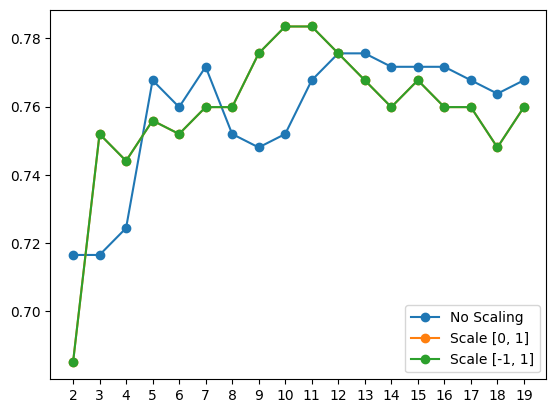

In [6]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# load the dataset
dataset = read_csv(datadir + 'pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    # define the scaler
scalers = [
    ("No Scaling", IdentityScaler()),
    ("Scale [0, 1]", MinMaxScaler(feature_range=(0, 1))),
    ("Scale [-1, 1]", MinMaxScaler(feature_range=(-1, 1))),
]

from collections import defaultdict

results = defaultdict(list)

for name, scaler in scalers:

    # scale train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled =scaler.transform(X_test)

    # test model with different number of neighbors
    print(f"--- {name} ---")
    for n_neighbors in range(2, 20):
        # create model

        knn = KNeighborsClassifier(n_neighbors=n_neighbors)

        # train it

        knn.fit(X_train_scaled, y_train)

        # predict on test set

        yhat = knn.predict(X_test_scaled)

        # evaluate predictions

        accuracy = accuracy_score(yhat, y_test)

        results[name].append((n_neighbors, accuracy))

        # print accuracy result
        print(f'n_neighbors: {n_neighbors:>2}\tAccuracy: {accuracy:.2%}')

# plot histograms
for name, data in results.items():
    # get just the accuracies
    data = np.array(data).T
    # plot the histogram
    plt.plot(data[0], data[1], "o-", label=name)
plt.legend()
plt.xticks(range(2, 20))
plt.show()

Aunque sea dificil ver en la gráfica, pero ambos escalados producen exactamente los mismos resultados. En cuanto a la comparación con no escalarlos,
aunque ambas gráficas no sean monotónicas, se ve que el máximo de la precisión se da en el caso de usar el escalado.

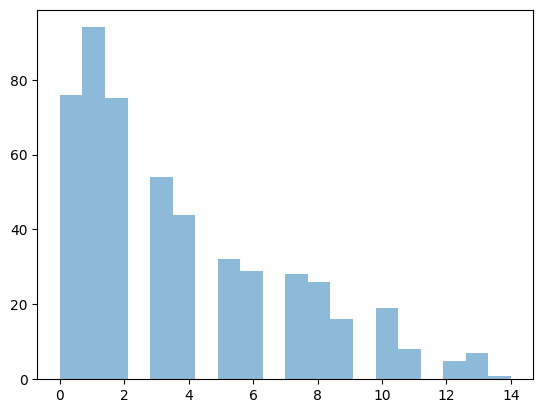

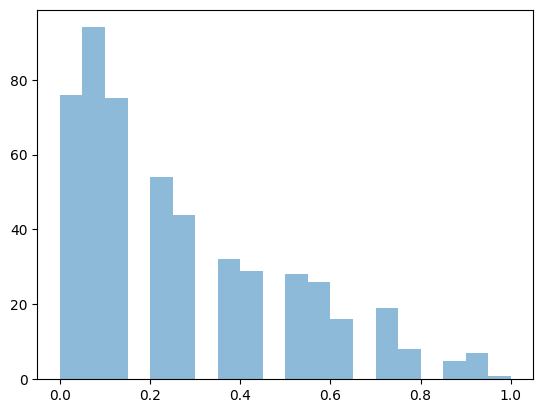

In [16]:
first_feature = X_train[:, 0]

first_feature_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(first_feature.reshape(-1, 1))

plt.hist(first_feature, bins=20, alpha=0.5, label="Original")
plt.show()
plt.hist(first_feature_scaled, bins=20, alpha=0.5, label="Scaled")
plt.show()

Como se ve, ambos histogramas tienen una forma idéntica, lo unico que cambia  son los valores de los ejes.

### Estandarización (z-score)

[Documentación en scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

¿Cuál es la precisión (accuracy) cuando se usa escalado? Compárala con la obtenida con los datos sin transformar (los originales, sin escalar)

Calcula la media y la desviación típica de los predictores originales y compáralos con los de los estandarizados. ¿Son los valores de estos últimos los que esperabas ver? ¿Porqué?

--- No Scaling ---
n_neighbors:  2	Accuracy: 71.65%
n_neighbors:  3	Accuracy: 71.65%
n_neighbors:  4	Accuracy: 72.44%
n_neighbors:  5	Accuracy: 76.77%
n_neighbors:  6	Accuracy: 75.98%
n_neighbors:  7	Accuracy: 77.17%
n_neighbors:  8	Accuracy: 75.20%
n_neighbors:  9	Accuracy: 74.80%
n_neighbors: 10	Accuracy: 75.20%
n_neighbors: 11	Accuracy: 76.77%
n_neighbors: 12	Accuracy: 77.56%
n_neighbors: 13	Accuracy: 77.56%
n_neighbors: 14	Accuracy: 77.17%
n_neighbors: 15	Accuracy: 77.17%
n_neighbors: 16	Accuracy: 77.17%
n_neighbors: 17	Accuracy: 76.77%
n_neighbors: 18	Accuracy: 76.38%
n_neighbors: 19	Accuracy: 76.77%
--- Standardize ---
n_neighbors:  2	Accuracy: 68.11%
n_neighbors:  3	Accuracy: 73.62%
n_neighbors:  4	Accuracy: 76.38%
n_neighbors:  5	Accuracy: 79.53%
n_neighbors:  6	Accuracy: 77.56%
n_neighbors:  7	Accuracy: 76.38%
n_neighbors:  8	Accuracy: 75.20%
n_neighbors:  9	Accuracy: 74.80%
n_neighbors: 10	Accuracy: 78.35%
n_neighbors: 11	Accuracy: 76.77%
n_neighbors: 12	Accuracy: 77.56%
n_ne

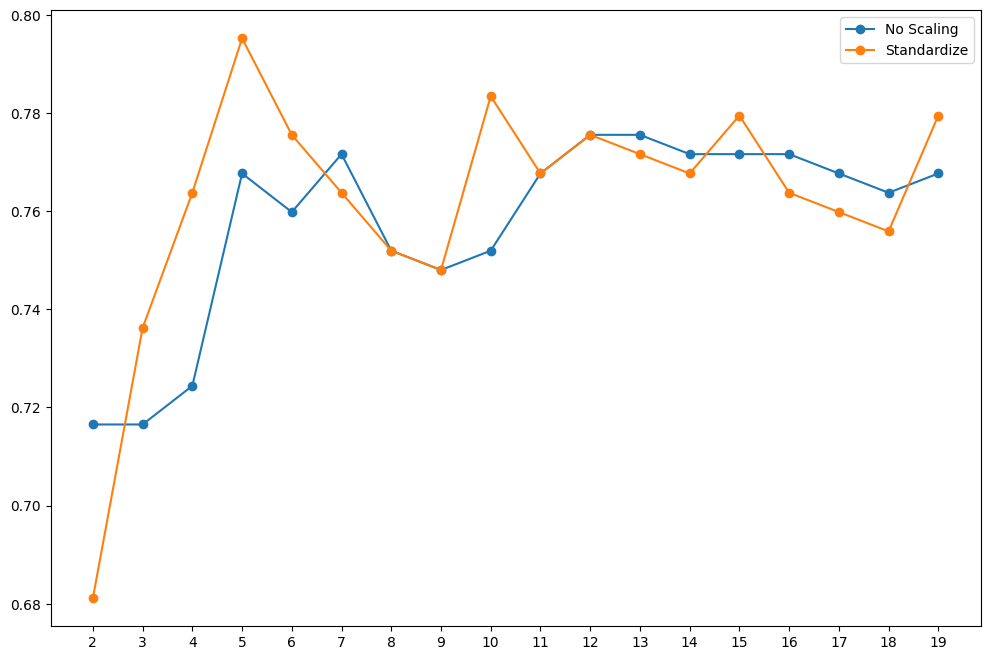

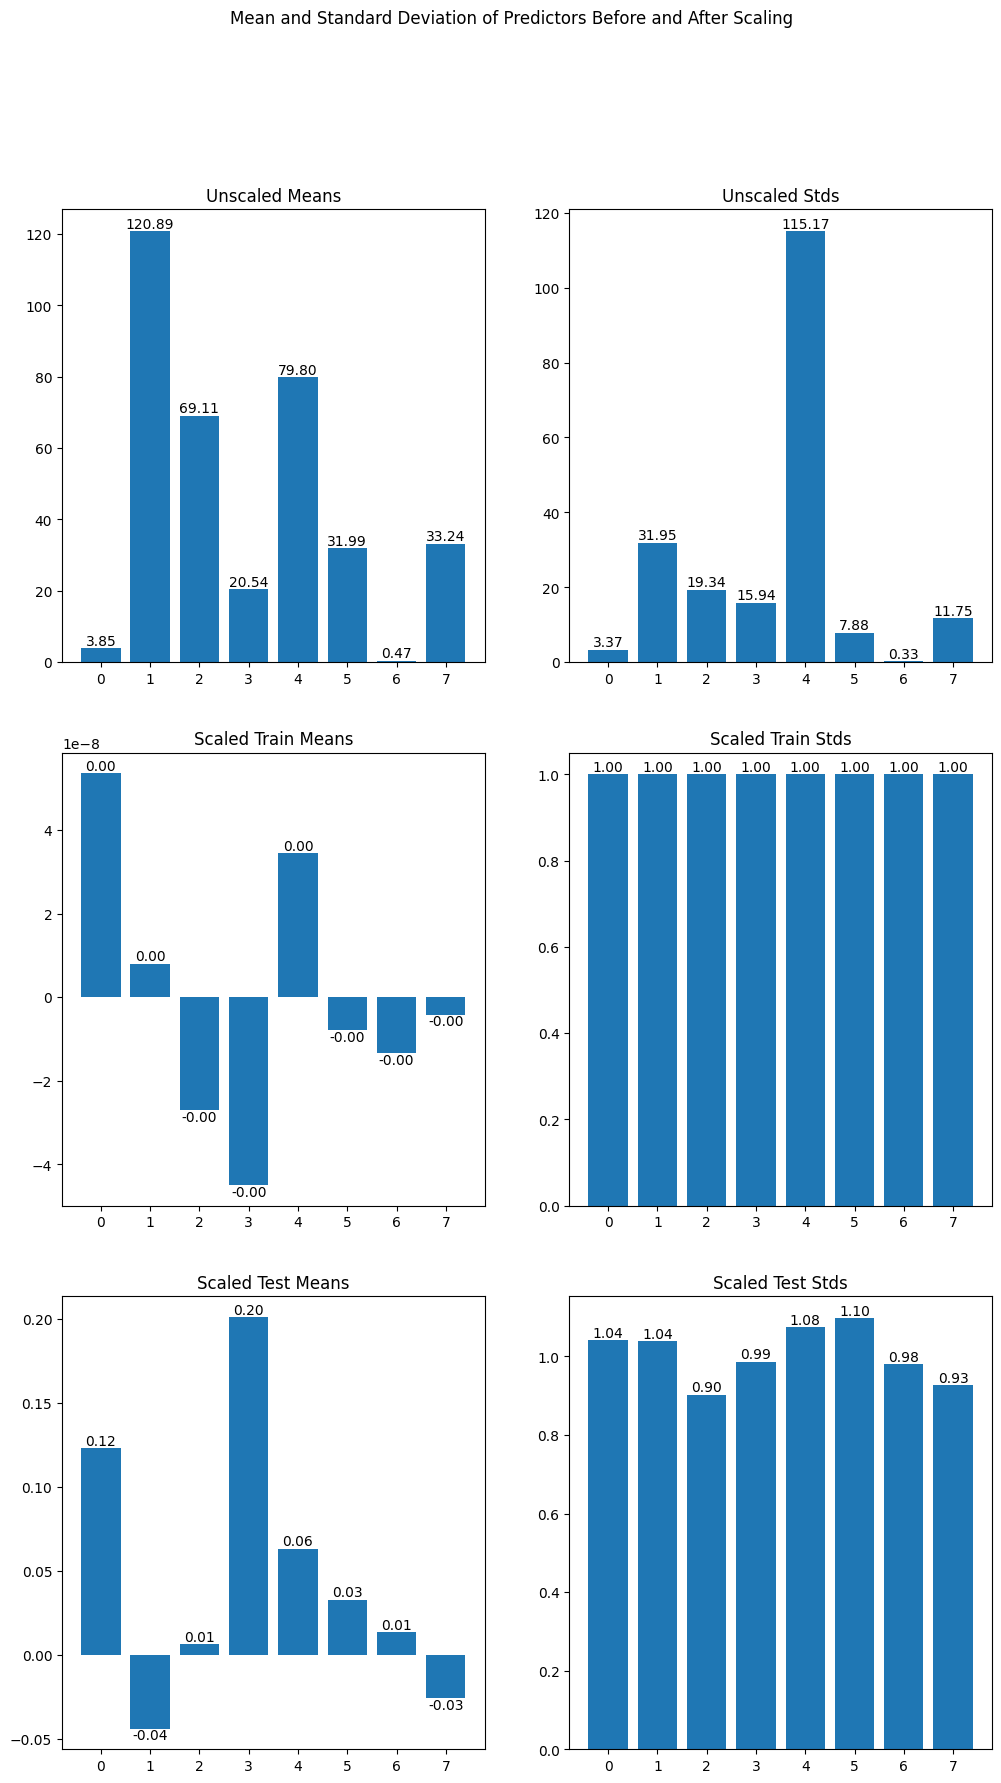

In [6]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load the dataset
dataset = read_csv(datadir + 'pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the scaler
scalers = [
    ("No Scaling", IdentityScaler()),
    ("Standardize", StandardScaler()),
]

# save the accuracy for plotting
from collections import defaultdict
results = defaultdict(list)

# scale train and test sets
for name, scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    print(f"--- {name} ---")
    # test model with different number of neighbors
    for n_neighbors in range(2, 20):
        # create model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        # train it
        knn.fit(X_train_scaled, y_train)

        # predict on test set
        yhat = knn.predict(X_test_scaled)

        # evaluate predictions
        accuracy = accuracy_score(yhat, y_test)

        # print accuracy result
        print(f'n_neighbors: {n_neighbors:>2}\tAccuracy: {accuracy:.2%}')
        results[name].append((n_neighbors, accuracy))

# plot accuracy
fig, ax = plt.subplots(figsize=(12, 8))
for name, data in results.items():
    data = np.array(data).T
    plt.plot(data[0], data[1], "o-", label=name)
    plt.xticks(data[0])
plt.legend()
plt.show()

# mean and standard deviation of predictors before
# and after scaling
unscaled_means = X.mean(axis=0)
unscaled_stds = X.std(axis=0)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

scaled_train_means = X_train_scaled.mean(axis=0)
scaled_train_stds = X_train_scaled.std(axis=0)
scaled_test_means = X_test_scaled.mean(axis=0)
scaled_test_stds = X_test_scaled.std(axis=0)

fig, axs = plt.subplots(3, 2, figsize=(12, 20))

def paint_mean_std(ax, means, stds, title):
    ax[0].set_title(f"{title} Means")
    ax[1].set_title(f"{title} Stds")
    ax[0].bar(range(len(means)), means)
    ax[1].bar(range(len(stds)), stds)
    ax[0].bar_label(ax[0].containers[0], fmt='%.2f')
    ax[1].bar_label(ax[1].containers[0], fmt='%.2f')

fig.suptitle("Mean and Standard Deviation of Predictors Before and After Scaling")
paint_mean_std(axs[0], unscaled_means, unscaled_stds, "Unscaled")
paint_mean_std(axs[1], scaled_train_means, scaled_train_stds, "Scaled Train")
paint_mean_std(axs[2], scaled_test_means, scaled_test_stds, "Scaled Test")

De nuevo se ve que la precisión de ambos varia segun el número de vecinos utilizado, pero aún así el máximo obtenido resulta del uso de la estandarización.

En cuanto a los gráficos de la comparación de la media y desviación típica, se ve que mientras que tienen valores disparados en los datos originales, tras la estandarización la media y la desviación típica son perfectamente 0 y 1 en el conjunto de train y muy cercanos a estos en el test.